In [1]:
## imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS 

In [2]:
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 120)
# overiding pandas defaults for better view of the df

In [3]:
df = pd.read_csv('loan.csv', parse_dates=True ,low_memory=False) # reading the loan data in memory

In [4]:
dd = pd.read_excel('Data_Dictionary.xlsx'); dd # loading and understanding the provided data dict.

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
5,annual_inc_joint,The combined self-reported annual income provi...
6,application_type,Indicates whether the loan is an individual ap...
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/...


In [5]:
df.shape

(39717, 111)

##### there are 39717 rows and 111 features in our dataset, which looks like :

In [6]:
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Data understanding & Data Cleaning

In [7]:
df.info(verbose=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Treating missing values

In [8]:
df.isna().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [9]:
(df.isna().sum()/df.shape[0]*100).sort_values() # percentage of missing values in each feature

id                                  0.000000
earliest_cr_line                    0.000000
inq_last_6mths                      0.000000
open_acc                            0.000000
pub_rec                             0.000000
revol_bal                           0.000000
total_acc                           0.000000
initial_list_status                 0.000000
out_prncp                           0.000000
out_prncp_inv                       0.000000
delinq_2yrs                         0.000000
total_pymnt                         0.000000
total_rec_int                       0.000000
total_rec_late_fee                  0.000000
recoveries                          0.000000
collection_recovery_fee             0.000000
last_pymnt_amnt                     0.000000
policy_code                         0.000000
application_type                    0.000000
acc_now_delinq                      0.000000
delinq_amnt                         0.000000
total_pymnt_inv                     0.000000
dti       

##### we'll drop all columns where majority (more than 90%) of the rows have missing values

In [10]:
cols_to_keep = (df.isna().sum()/df.shape[0]*100)>90; cols_to_keep 

id                                False
member_id                         False
loan_amnt                         False
funded_amnt                       False
funded_amnt_inv                   False
term                              False
int_rate                          False
installment                       False
grade                             False
sub_grade                         False
emp_title                         False
emp_length                        False
home_ownership                    False
annual_inc                        False
verification_status               False
issue_d                           False
loan_status                       False
pymnt_plan                        False
url                               False
desc                              False
purpose                           False
title                             False
zip_code                          False
addr_state                        False
dti                               False


In [11]:
cols_to_keep = cols_to_keep[~cols_to_keep].index ; cols_to_keep

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [12]:
df.drop(labels = df.columns.difference(cols_to_keep), axis=1, inplace=True) # dropping columns with < 90% missing values

In [13]:
df.shape

(39717, 55)

##### we can also further drop:
* identifier features
* meta data
* most behavioural features since we're analyzing data post the loan was approved
* data generated after the loan was disburssed

In [14]:
feat_not_imp  = ['id', 'member_id', 'url', 'desc', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code','chargeoff_within_12_mths','tax_liens','delinq_2yrs','earliest_cr_line',	'pub_rec_bankruptcies']## further dropping features w.r.t to DD


In [15]:
df.drop(labels = feat_not_imp, axis=1, inplace=True, errors= 'ignore') 

In [16]:
df.shape

(39717, 24)

In [17]:
df.loan_status.value_counts(1) # checking diferrent loan statuses

Fully Paid     0.829620
Charged Off    0.141677
Current        0.028703
Name: loan_status, dtype: float64

##### we should also drop the data from loan accounts which are still active(current)


In [18]:
df = df[df.loan_status!= 'Current'] ## removing users with active loans

In [19]:
df.shape

(38577, 24)

##### droppiing features which contain only one unique values, as they essentially don't add anything to our analysis

In [20]:
df.nunique().sort_values()

delinq_amnt                1
application_type           1
acc_now_delinq             1
pymnt_plan                 1
term                       2
loan_status                2
verification_status        3
home_ownership             5
grade                      7
emp_length                11
purpose                   14
sub_grade                 35
addr_state                50
issue_d                   55
int_rate                 370
zip_code                 822
loan_amnt                870
funded_amnt             1019
dti                     2853
annual_inc              5215
funded_amnt_inv         8050
installment            15022
title                  19297
emp_title              28027
dtype: int64

In [21]:
df.head(3)[['pymnt_plan', 'application_type', 'acc_now_delinq', 'delinq_amnt']] ## chcecking values before dropping

,pymnt_plan,application_type,acc_now_delinq,delinq_amnt
0,n,INDIVIDUAL,0,0
1,n,INDIVIDUAL,0,0
2,n,INDIVIDUAL,0,0


In [22]:
df.drop(['pymnt_plan', 'application_type', 'acc_now_delinq', 'delinq_amnt'], axis=1, inplace=True) ## droping features with only one unique value


In [23]:
df.shape

(38577, 20)

In [24]:
(df.isna().sum()/df.shape[0]*100).sort_values()

loan_amnt              0.000000
zip_code               0.000000
purpose                0.000000
loan_status            0.000000
issue_d                0.000000
verification_status    0.000000
annual_inc             0.000000
home_ownership         0.000000
addr_state             0.000000
dti                    0.000000
sub_grade              0.000000
grade                  0.000000
installment            0.000000
int_rate               0.000000
term                   0.000000
funded_amnt_inv        0.000000
funded_amnt            0.000000
title                  0.028514
emp_length             2.677761
emp_title              6.185033
dtype: float64

<AxesSubplot:>

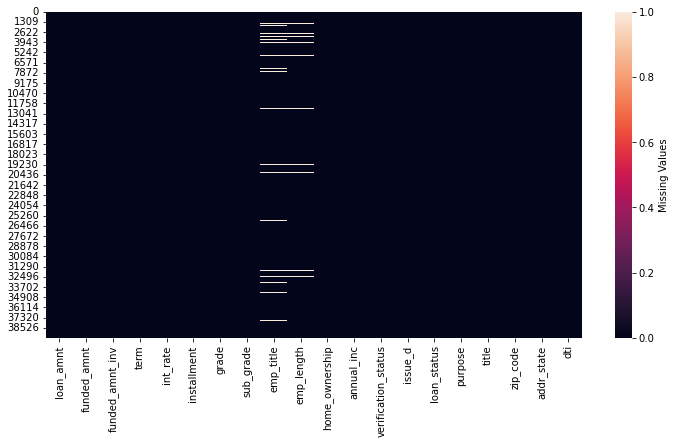

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(),
            cbar_kws={'label': 'Missing Values'}) # visualising missing value locations with the help of a heatmap

##### the only columns which still have missing values are - title, emp_length and emp_title. since these features are related to once employment, they being missing are valid

In [26]:
df.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72


In [27]:
df.dtypes

loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_title               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
title                   object
zip_code                object
addr_state              object
dti                    float64
dtype: object

### Transformations (fixing values)

In [28]:
df.term.nunique()

2

In [29]:
df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [30]:
df['term'] = df['term'].apply(lambda x: int(x.strip().split(' ')[0])) # fixing the feature month to remove `month`

In [31]:
df.rename({'term': 'term_months'}, axis=1, inplace=True) # renaming term column

In [32]:
df.int_rate.head(10)

0     10.65%
1     15.27%
2     15.96%
3     13.49%
5      7.90%
6     15.96%
7     18.64%
8     21.28%
9     12.69%
10    14.65%
Name: int_rate, dtype: object

In [33]:
df['int_rate'] = df['int_rate'].apply(lambda x: float(x.split('%')[0])) # fixing the feature int_rate to remove `%` and make the dtype float

In [34]:
df.rename({'int_rate': 'int_rate_pct'}, axis=1, inplace=True)# renaming int_rate column

In [35]:
df.emp_length.unique(), df.emp_length.nunique(), 

(array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
        '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
        nan], dtype=object),
 11)

In [36]:
df.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

#### we can let the emp_length be as it is, as there are only 11 unique values and it makes for a good ordered categorical feature

In [37]:
df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y') # fixind the issue_d feature and converting the dtype to datetime

In [38]:
df.verification_status.value_counts() # we can also fix the verification status by replacing Source Verified with verified

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

In [39]:
df['verification_status'] = df['verification_status'].str.replace('Source Verified','Verified')

In [40]:
df.verification_status.value_counts()

Verified        21883
Not Verified    16694
Name: verification_status, dtype: int64

### Outlier recognition and fixing

In [41]:
df.select_dtypes([float, int,]).describe().apply(lambda s: s.apply('{0:.5f}'.format)) ## exploring numeric features (summary metrics) 


,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate_pct,installment,annual_inc,dti
count,38577.00000,38577.00000,38577.00000,38577.00000,38577.00000,38577.00000,38577.00000,38577.00000
mean,11047.02543,10784.05851,10222.48112,41.89844,11.93222,322.46632,68777.97368,13.27273
std,7348.44165,7090.30603,7022.72064,10.33314,3.69133,208.63921,64218.68180,6.67304
min,500.00000,500.00000,0.00000,36.00000,5.42000,15.69000,4000.00000,0.00000
25%,5300.00000,5200.00000,5000.00000,36.00000,8.94000,165.74000,40000.00000,8.13000
50%,9600.00000,9550.00000,8733.44000,36.00000,11.71000,277.86000,58868.00000,13.37000
75%,15000.00000,15000.00000,14000.00000,36.00000,14.38000,425.55000,82000.00000,18.56000
max,35000.00000,35000.00000,35000.00000,60.00000,24.40000,1305.19000,6000000.00000,29.99000


<AxesSubplot:>

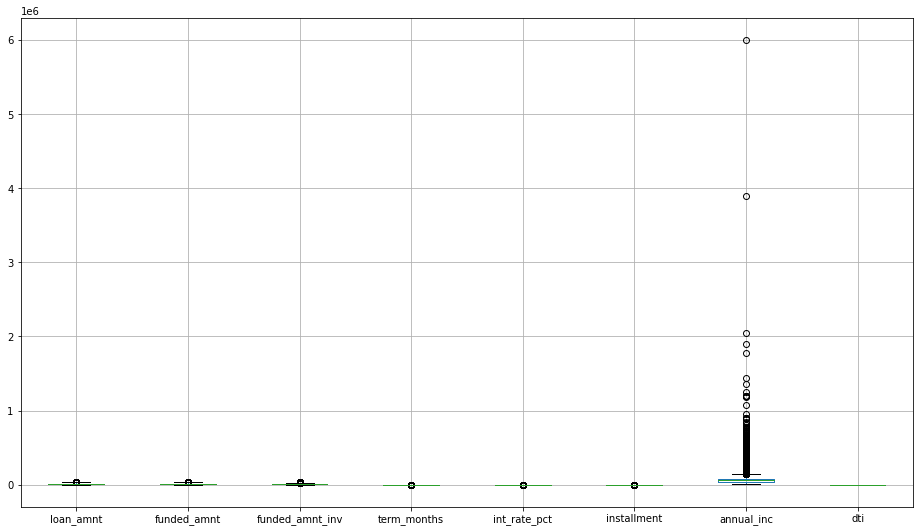

In [42]:
df.boxplot(list(df.select_dtypes([float, int,])), figsize=(16,9))

##### we can clearly see from the above boxplots that we do have some outliers in our data, but we also see in our summary metrics that none of these outliers seems to be a result of some sort data sourcing issue or something going un-noticed, hence we'll be better off to not drop any values considering them as outliers, as this may lead to impact our analysis

In [43]:
df.info(verbose=1) # glancing at the final dataset features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            38577 non-null  int64         
 1   funded_amnt          38577 non-null  int64         
 2   funded_amnt_inv      38577 non-null  float64       
 3   term_months          38577 non-null  int64         
 4   int_rate_pct         38577 non-null  float64       
 5   installment          38577 non-null  float64       
 6   grade                38577 non-null  object        
 7   sub_grade            38577 non-null  object        
 8   emp_title            36191 non-null  object        
 9   emp_length           37544 non-null  object        
 10  home_ownership       38577 non-null  object        
 11  annual_inc           38577 non-null  float64       
 12  verification_status  38577 non-null  object        
 13  issue_d              38577 non-

### Augmented features (derieved metrics)

In [44]:
df['anual_income_bucketed'] = pd.qcut(df['annual_inc'], q=6, precision=0)
df['funded_amnt_inv_bucketed'] = pd.qcut(df['funded_amnt_inv'], q=6, precision=0) ## we can bucket anual income and loan amount to also analyse them as categorical features

In [45]:
df['interest_rate_bucketed'] = pd.qcut(df['int_rate_pct'], q=4, precision=1) ## we can also bucket interest rate percent 


In [46]:
df['issue_year'] = df.issue_d.dt.year ## we can extract year from loan issue date

In [47]:
df.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate_pct,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,anual_income_bucketed,funded_amnt_inv_bucketed,interest_rate_bucketed,issue_year
0,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,860xx,AZ,27.65,"(3999.0, 35000.0]","(3975.0, 6000.0]","(8.9, 11.7]",2011
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Verified,2011-12-01,Charged Off,car,bike,309xx,GA,1.00,"(3999.0, 35000.0]","(-1.0, 3975.0]","(14.4, 24.4]",2011
2,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,606xx,IL,8.72,"(3999.0, 35000.0]","(-1.0, 3975.0]","(14.4, 24.4]",2011


## Analysis

#### Understanding individual feature (Univariate Analysis)

#### exploring quantitaive variables

In [48]:
df.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate_pct,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,anual_income_bucketed,funded_amnt_inv_bucketed,interest_rate_bucketed,issue_year
0,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,860xx,AZ,27.65,"(3999.0, 35000.0]","(3975.0, 6000.0]","(8.9, 11.7]",2011
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Verified,2011-12-01,Charged Off,car,bike,309xx,GA,1.00,"(3999.0, 35000.0]","(-1.0, 3975.0]","(14.4, 24.4]",2011
2,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,606xx,IL,8.72,"(3999.0, 35000.0]","(-1.0, 3975.0]","(14.4, 24.4]",2011


##### exploring numeric features (summary metrics) 

In [49]:
df.select_dtypes([float, int,]).describe().apply(lambda s: s.apply('{0:.5f}'.format)) ## exploring numeric features (summary metrics) 


,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate_pct,installment,annual_inc,dti,issue_year
count,38577.00000,38577.00000,38577.00000,38577.00000,38577.00000,38577.00000,38577.00000,38577.00000,38577.00000
mean,11047.02543,10784.05851,10222.48112,41.89844,11.93222,322.46632,68777.97368,13.27273,2010.30907
std,7348.44165,7090.30603,7022.72064,10.33314,3.69133,208.63921,64218.68180,6.67304,0.88266
min,500.00000,500.00000,0.00000,36.00000,5.42000,15.69000,4000.00000,0.00000,2007.00000
25%,5300.00000,5200.00000,5000.00000,36.00000,8.94000,165.74000,40000.00000,8.13000,2010.00000
50%,9600.00000,9550.00000,8733.44000,36.00000,11.71000,277.86000,58868.00000,13.37000,2011.00000
75%,15000.00000,15000.00000,14000.00000,36.00000,14.38000,425.55000,82000.00000,18.56000,2011.00000
max,35000.00000,35000.00000,35000.00000,60.00000,24.40000,1305.19000,6000000.00000,29.99000,2011.00000


##### understanding correlation between different funded amounts below

In [50]:
np.corrcoef(df.loan_amnt, df.funded_amnt)

array([[1.        , 0.98178962],
       [0.98178962, 1.        ]])

In [51]:
np.corrcoef(df.loan_amnt, df.funded_amnt)

array([[1.        , 0.98178962],
       [0.98178962, 1.        ]])

In [52]:
np.corrcoef(df.funded_amnt, df.funded_amnt_inv)

array([[1.        , 0.95617165],
       [0.95617165, 1.        ]])

In [53]:
np.corrcoef(df.loan_amnt, df.funded_amnt_inv)

array([[1.      , 0.937922],
       [0.937922, 1.      ]])

##### going forward, we'll be using funded_amnt_inv as the proxy to loan amount, since that is the amount that was finally approved by the investor.Also we see the correlation is quite high between the funded_amnt_inv and the loan_amnt feature, which is the amount the borrower applied for.


In [54]:
df[df.funded_amnt_inv==0].shape

(129, 24)

##### we see there are some 129 odd rows with fundeed amount as 0. we can consider this to be data collection error and would be better off dropping them

In [55]:
df = df[df.funded_amnt_inv!=0]

In [56]:
df.shape

(38448, 24)

In [57]:
df.drop(['loan_amnt', 'funded_amnt'], axis =1, inplace = True)

In [58]:
df.shape

(38448, 22)

##### visualising summary metrics via boxplots

<AxesSubplot:>

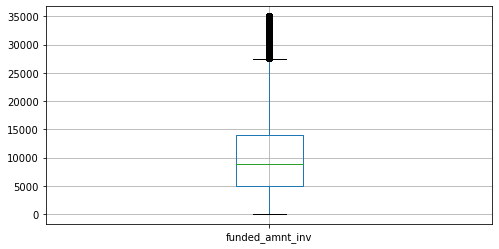

In [59]:
df.boxplot(column = ['funded_amnt_inv', ], figsize=(8,4))

<AxesSubplot:title={'center':'funded_amnt_inv'}, xlabel='loan_status'>

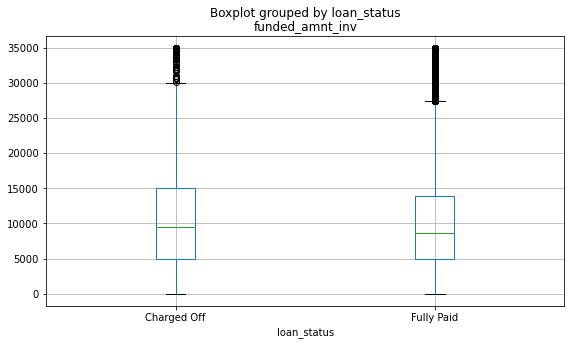

In [60]:
df.boxplot(column = ['funded_amnt_inv', ],by = 'loan_status', figsize=(9,5))

<AxesSubplot:>

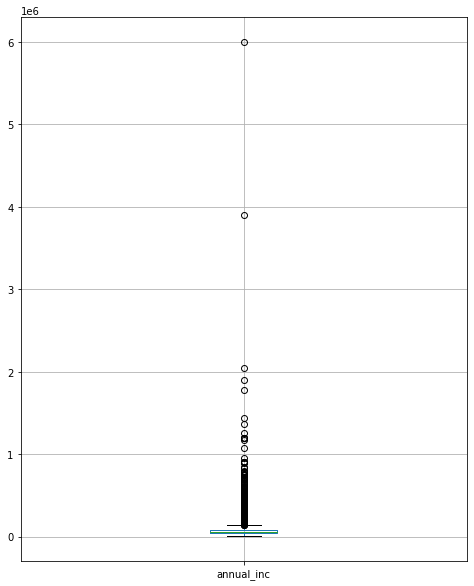

In [61]:
df.boxplot(column = ['annual_inc'], figsize=(8,10))

<AxesSubplot:>

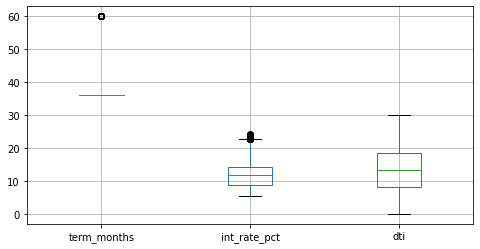

In [62]:
df.boxplot(column=['term_months', 'int_rate_pct', 'dti'], figsize=(8,4))

<AxesSubplot:>

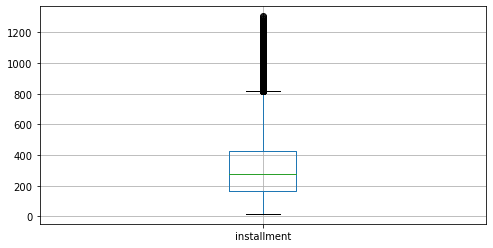

In [63]:
df.boxplot(column=['installment'], figsize=(8,4))

#### exploring categorical variables

In [64]:
df.columns.difference((df.select_dtypes([float, int,]).columns))

Index(['addr_state', 'anual_income_bucketed', 'emp_length', 'emp_title',
       'funded_amnt_inv_bucketed', 'grade', 'home_ownership',
       'interest_rate_bucketed', 'issue_d', 'loan_status', 'purpose',
       'sub_grade', 'title', 'verification_status', 'zip_code'],
      dtype='object')

In [65]:
df.loan_status.value_counts(1)

Fully Paid     0.854349
Charged Off    0.145651
Name: loan_status, dtype: float64

<AxesSubplot:>

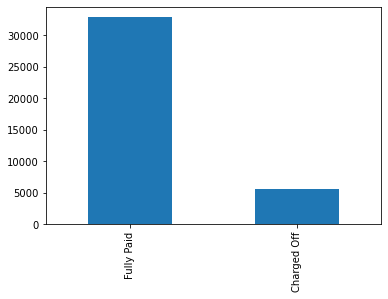

In [66]:
df.loan_status.value_counts().plot(kind = 'bar') # visualizing target variable distributuion

<AxesSubplot:xlabel='addr_state', ylabel='count'>

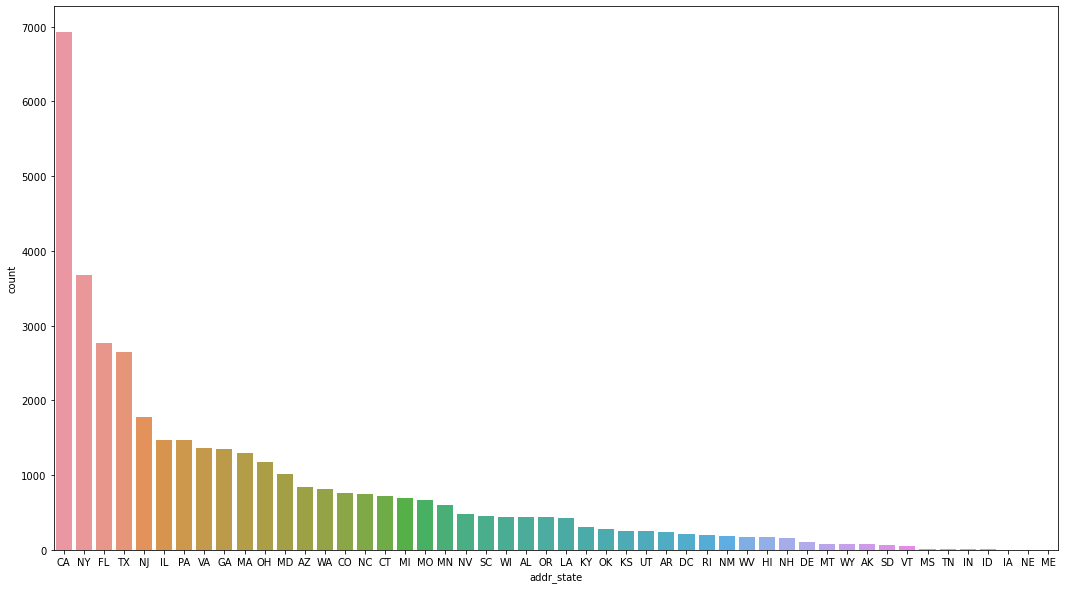

In [67]:
plt.figure(figsize=[18,10])
sns.countplot(x = 'addr_state', data=df, order = df.addr_state.value_counts().index,) # visualizing state wise distribution of loan disbursal


##### As seen in the above barplot, most loans were issued in California (CA)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

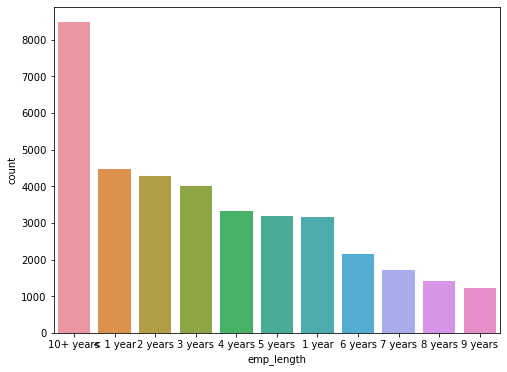

In [68]:
plt.figure(figsize=[8,6])
sns.countplot(x = 'emp_length', data=df, order = df.emp_length.value_counts().index,) # visualizing employment length distribution of different loans disburssed


##### As seen in the above barplot, most loans were issued to individuals with 10+ years of work exp.

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

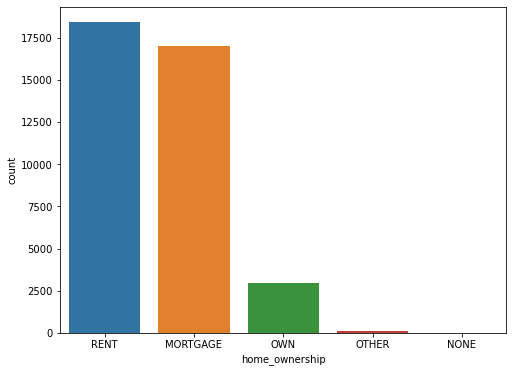

In [69]:
plt.figure(figsize=[8,6])
sns.countplot(x = 'home_ownership', data=df, order = df.home_ownership.value_counts().index,) # visualizing home ownership type distribution of different loans disburssed


##### As seen in the above barplot, most loans were issued to users with rented homes

<AxesSubplot:xlabel='purpose', ylabel='count'>

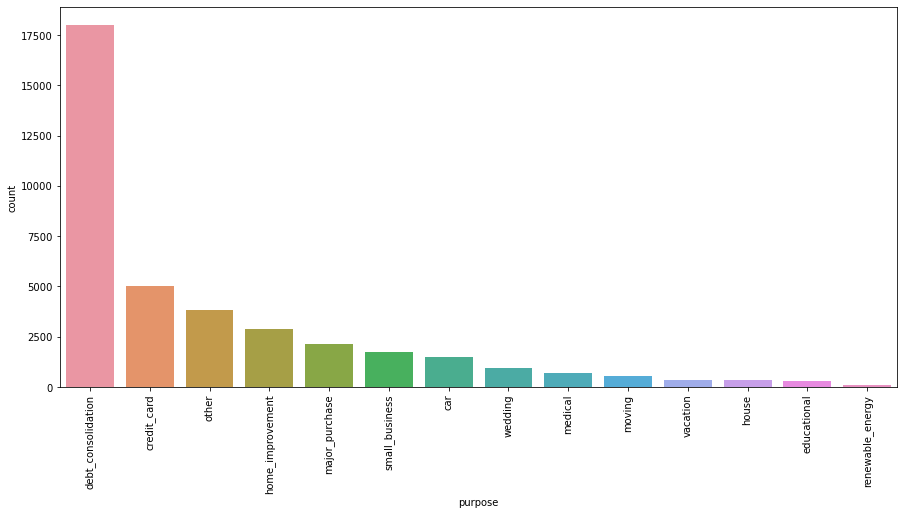

In [70]:
plt.figure(figsize=[15,7])
plt.xticks(rotation = 'vertical')
sns.countplot(x = 'purpose', data=df, order = df.purpose.value_counts().index,) # visualizing loan purpose distribution of different loans disburssed


##### As seen in the above barplot, most loans were for consolidating debt

<AxesSubplot:xlabel='verification_status', ylabel='count'>

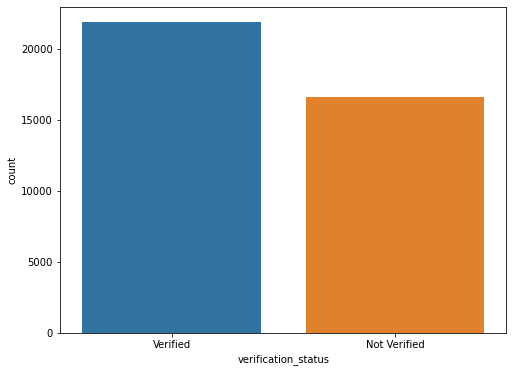

In [71]:
plt.figure(figsize=[8,6])
sns.countplot(x = 'verification_status', data=df, order = df.verification_status.value_counts().index,) # visualizing verification status of different loans disburssed


##### As seen in the above barplot, income status for most users was not verified

<AxesSubplot:xlabel='grade', ylabel='count'>

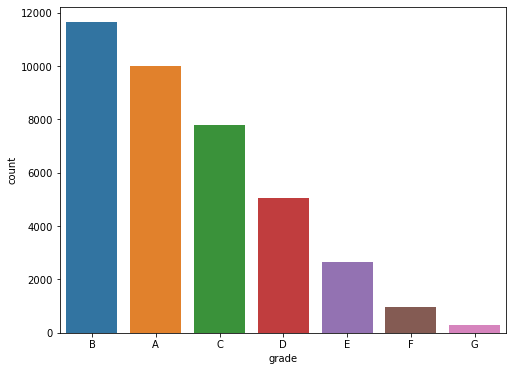

In [72]:
plt.figure(figsize=[8,6])
sns.countplot(x = 'grade', data=df, order = df.grade.value_counts().index,)  # visualizing grade distribution of different loans disburssed

##### As seen in the above barplot, most loans were issued to grade B users

<AxesSubplot:xlabel='issue_year', ylabel='count'>

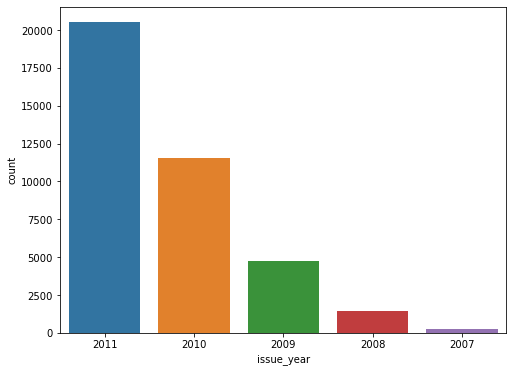

In [73]:
plt.figure(figsize=[8,6])
sns.countplot(x = 'issue_year', data=df, order = df.issue_year.value_counts().index,) # visualizing loan issue year distribution of different loans disburssed

##### As seen in the above barplot, most loans were issued in 2011 and the least in 2007-08, probably due to recession

In [74]:
dd

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
5,annual_inc_joint,The combined self-reported annual income provi...
6,application_type,Indicates whether the loan is an individual ap...
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/...


In [75]:
df.emp_title.value_counts() #exploring top employers of loan users

US Army                     131
Bank of America             107
IBM                          65
AT&T                         57
Kaiser Permanente            55
                           ... 
Daughtry Engineering          1
ABS Presort                   1
Metropolitian Dialysis        1
Pulaski County Treasurer      1
Evergreen Center              1
Name: emp_title, Length: 27953, dtype: int64

##### Seems like most users, for whom the employer is known, are working for US Army

In [76]:
stopwords = set(STOPWORDS)
def get_wordcloud(data, title = None):
    '''
    custom function to plot a wordcloud
    '''
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=42 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


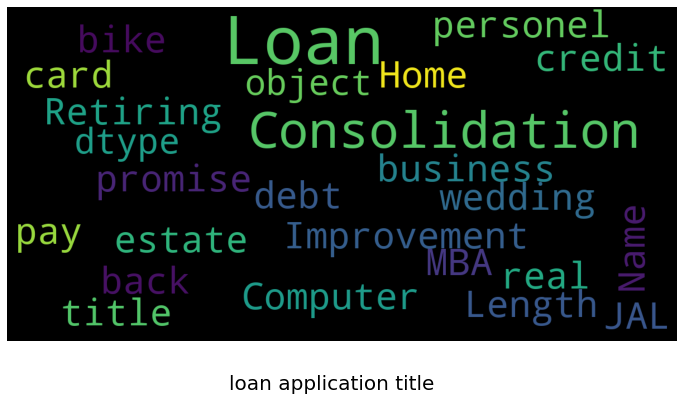

In [77]:
get_wordcloud(df.title, 'loan application title') # visualizing top loan application titles

#### Segmented Univariate Analysis

#### we can use segmented univatitae analysis to get a sense of how different categorical variables impact our target variable - loan status

In [78]:
def segmented_comparison(by, df):
    '''
    custom function to calculate the ratio of defaults for a particular feature
    '''
    gb = df.groupby([by, 'loan_status'])['loan_status'].agg({'count'}).reset_index()
    gb['ratio'] = gb.groupby(by)['count'].transform(lambda x: x/sum(x))
    return gb

In [79]:
def plot_default_ratio(df, key, rotate = False, big_chart = False):
    '''
    custom function to plot default ratio distribution
    '''
    if rotate:
        rot = 90
    else:
        rot = 0
    if big_chart:
        fig = (12,7)
    else:
        fig = (8,6)
    return df[df.loan_status =='Charged Off'].drop(['loan_status', 'count'],1).set_index(key).plot(kind = 'bar', ylabel = 'percentage_charged_off', rot= rot, figsize = fig)


<AxesSubplot:title={'center':'funded_amnt_inv'}, xlabel='loan_status'>

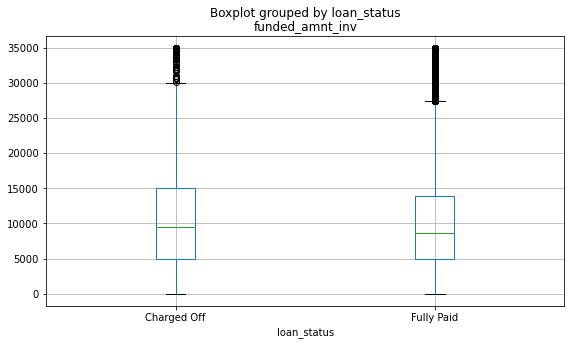

In [80]:
df.boxplot(column = ['funded_amnt_inv', ],by = 'loan_status', figsize=(9,5))

#### home ownership impact on loan_status

In [81]:
sc_ho = segmented_comparison('home_ownership', df); sc_ho

,home_ownership,loan_status,count,ratio
0,MORTGAGE,Charged Off,2318,0.136522
1,MORTGAGE,Fully Paid,14661,0.863478
2,NONE,Fully Paid,3,1.000000
3,OTHER,Charged Off,17,0.178947
4,OTHER,Fully Paid,78,0.821053
5,OWN,Charged Off,442,0.148972
6,OWN,Fully Paid,2525,0.851028
7,RENT,Charged Off,2823,0.153391
8,RENT,Fully Paid,15581,0.846609


<AxesSubplot:xlabel='home_ownership', ylabel='count'>

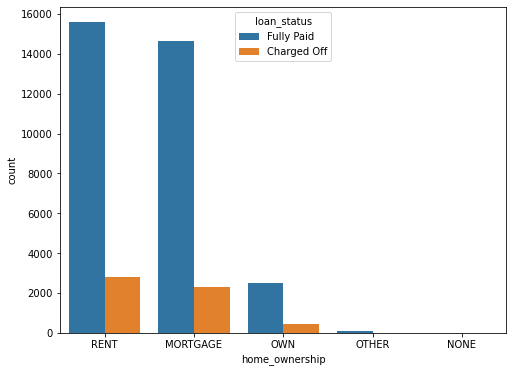

In [82]:
plt.figure(figsize=[8,6])
sns.countplot(x = 'home_ownership', data=df, order = df.home_ownership.value_counts().index,hue = 'loan_status')

/var/folders/z0/wbc1b27j3r5102_79kyb6hyr0000gn/T/ipykernel_10529/1578468429.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  return df[df.loan_status =='Charged Off'].drop(['loan_status', 'count'],1).set_index(key).plot(kind = 'bar', ylabel = 'percentage_charged_off', rot= rot, figsize = fig)


<AxesSubplot:xlabel='home_ownership', ylabel='percentage_charged_off'>

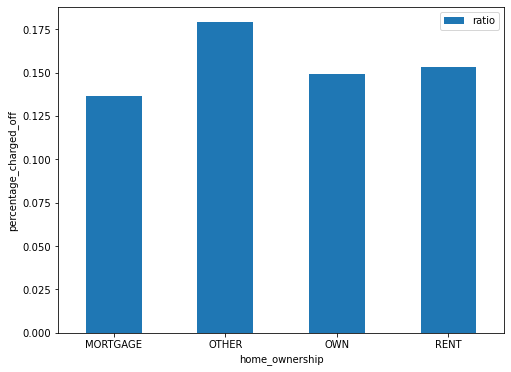

In [83]:
plot_default_ratio(sc_ho, 'home_ownership',)

### we can clearly see from the analysis above that users with `other` home ownership default much more often, at ~18% vs. a median of ~14% in other (own, rent, mortgage) ownership types

#### Address state impact on loan_status

In [84]:
sc_state = segmented_comparison('addr_state', df); sc_state

,addr_state,loan_status,count,ratio
0,AK,Charged Off,15,0.192308
1,AK,Fully Paid,63,0.807692
2,AL,Charged Off,54,0.124138
3,AL,Fully Paid,381,0.875862
4,AR,Charged Off,27,0.115385
5,AR,Fully Paid,207,0.884615
6,AZ,Charged Off,123,0.145218
7,AZ,Fully Paid,724,0.854782
8,CA,Charged Off,1122,0.161998
9,CA,Fully Paid,5804,0.838002


<AxesSubplot:xlabel='addr_state', ylabel='count'>

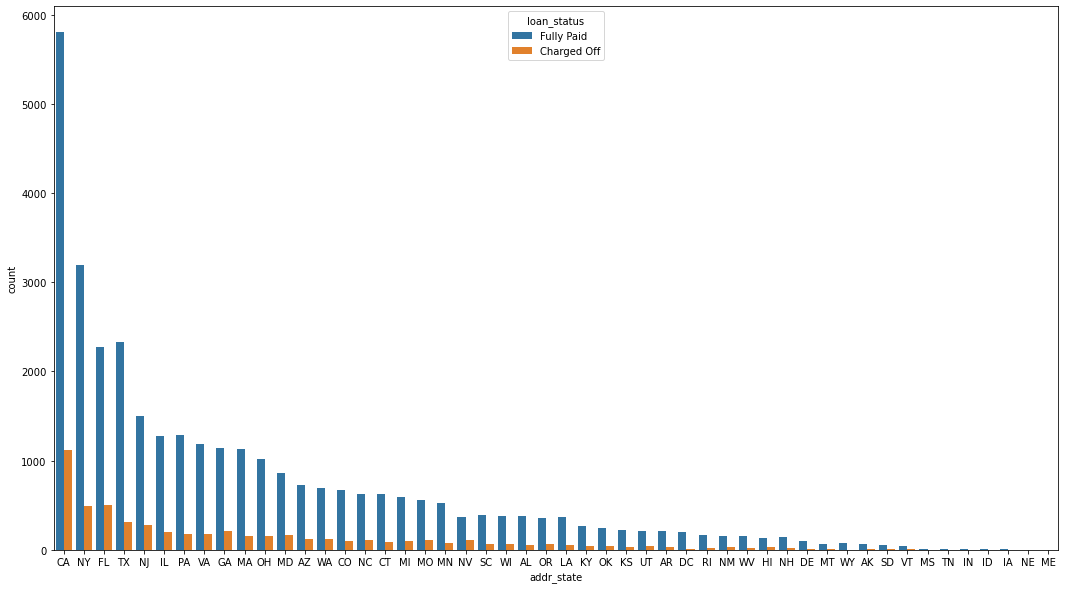

In [85]:
plt.figure(figsize=[18,10])
sns.countplot(x = 'addr_state', data=df, order = df.addr_state.value_counts().index,hue = 'loan_status')

/var/folders/z0/wbc1b27j3r5102_79kyb6hyr0000gn/T/ipykernel_10529/1578468429.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  return df[df.loan_status =='Charged Off'].drop(['loan_status', 'count'],1).set_index(key).plot(kind = 'bar', ylabel = 'percentage_charged_off', rot= rot, figsize = fig)


<AxesSubplot:xlabel='addr_state', ylabel='percentage_charged_off'>

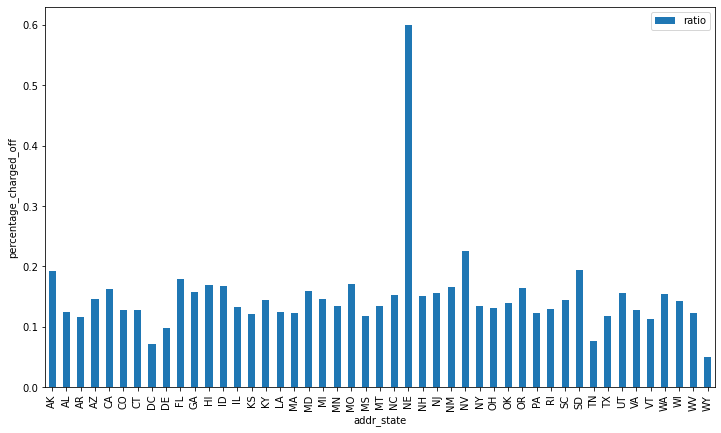

In [86]:
plot_default_ratio(sc_state, 'addr_state', True, True)

### we can see here that users from state `NE` have a whopping 60% of defaulting. It is worth mentioning only a total of 5 loans were issued in this state, so we don't have big enough sample size. The next worse performing state is `NV` with a ~22% default rate

#### employment length impact on loan_status

In [87]:
sc_el = segmented_comparison('emp_length', df); sc_el

,emp_length,loan_status,count,ratio
0,1 year,Charged Off,450,0.142993
1,1 year,Fully Paid,2697,0.857007
2,10+ years,Charged Off,1328,0.156770
3,10+ years,Fully Paid,7143,0.843230
4,2 years,Charged Off,564,0.131899
5,2 years,Fully Paid,3712,0.868101
6,3 years,Charged Off,555,0.138542
7,3 years,Fully Paid,3451,0.861458
8,4 years,Charged Off,460,0.137972
9,4 years,Fully Paid,2874,0.862028


<AxesSubplot:xlabel='emp_length', ylabel='count'>

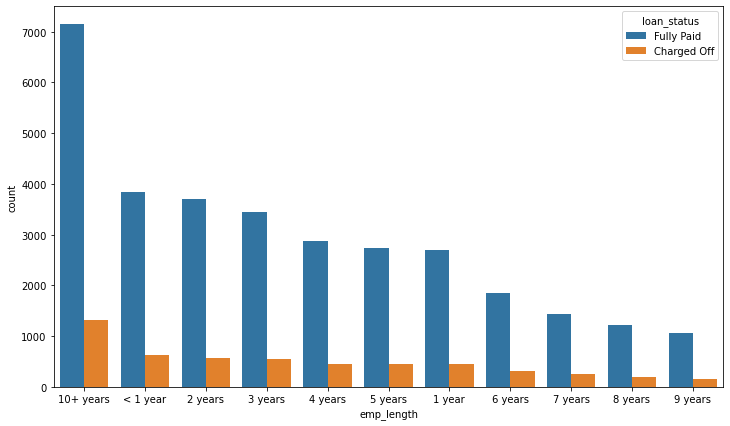

In [88]:
plt.figure(figsize=[12,7])
sns.countplot(x = 'emp_length', data=df, order = df.emp_length.value_counts().index,hue = 'loan_status')

/var/folders/z0/wbc1b27j3r5102_79kyb6hyr0000gn/T/ipykernel_10529/1578468429.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  return df[df.loan_status =='Charged Off'].drop(['loan_status', 'count'],1).set_index(key).plot(kind = 'bar', ylabel = 'percentage_charged_off', rot= rot, figsize = fig)


<AxesSubplot:xlabel='emp_length', ylabel='percentage_charged_off'>

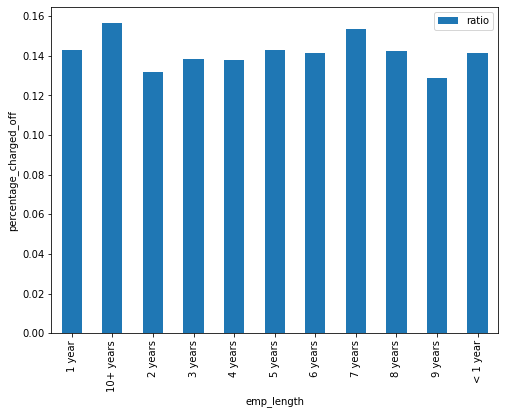

In [89]:
plot_default_ratio(sc_el, 'emp_length', True)

### There is not much of a variance when it comes to a users work experience and they defaulting to conclude anything. Although it seems users with 10+ years of work exp. default the most

#### purpose impact on loan_status

In [90]:
sc_purpose = segmented_comparison('purpose', df); sc_purpose

,purpose,loan_status,count,ratio
0,car,Charged Off,159,0.106355
1,car,Fully Paid,1336,0.893645
2,credit_card,Charged Off,541,0.107919
3,credit_card,Fully Paid,4472,0.892081
4,debt_consolidation,Charged Off,2755,0.152979
5,debt_consolidation,Fully Paid,15254,0.847021
6,educational,Charged Off,56,0.176101
7,educational,Fully Paid,262,0.823899
8,home_improvement,Charged Off,345,0.120293
9,home_improvement,Fully Paid,2523,0.879707


<AxesSubplot:xlabel='purpose', ylabel='count'>

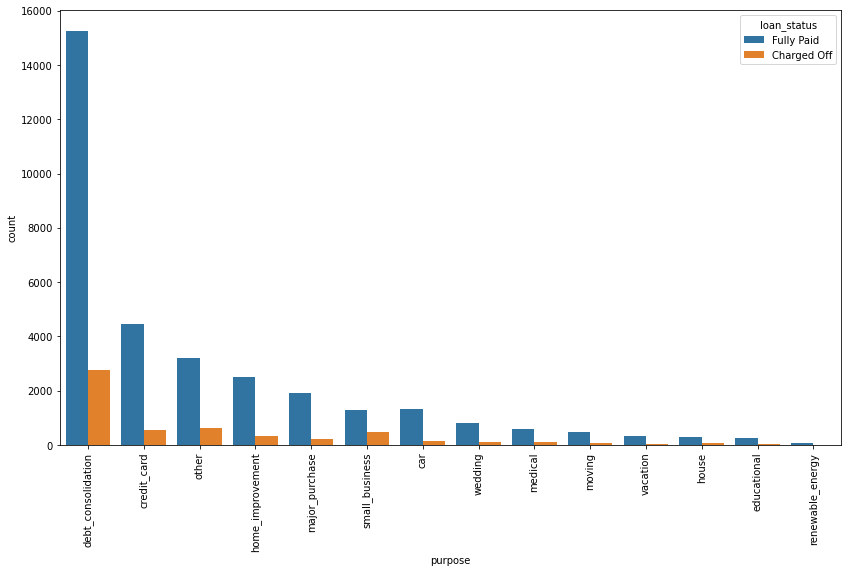

In [91]:
plt.figure(figsize=[14,8])
plt.xticks(rotation = 'vertical')
sns.countplot(x = 'purpose', data=df, order = df.purpose.value_counts().index,hue = 'loan_status')

/var/folders/z0/wbc1b27j3r5102_79kyb6hyr0000gn/T/ipykernel_10529/1578468429.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  return df[df.loan_status =='Charged Off'].drop(['loan_status', 'count'],1).set_index(key).plot(kind = 'bar', ylabel = 'percentage_charged_off', rot= rot, figsize = fig)


<AxesSubplot:xlabel='purpose', ylabel='percentage_charged_off'>

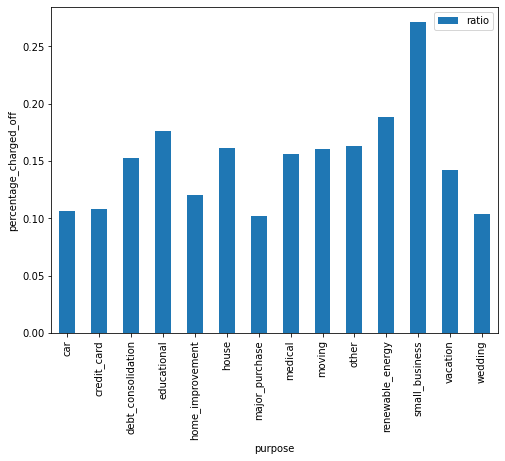

In [92]:
plot_default_ratio(sc_purpose, 'purpose', True)

### we can see that loans for `small_business` are the least secure and more likely to default than others

#### verification status impact on loan_status

In [93]:
sc_vs = segmented_comparison('verification_status', df); sc_vs

,verification_status,loan_status,count,ratio
0,Not Verified,Charged Off,2122,0.127955
1,Not Verified,Fully Paid,14462,0.872045
2,Verified,Charged Off,3478,0.159074
3,Verified,Fully Paid,18386,0.840926


<AxesSubplot:xlabel='verification_status', ylabel='count'>

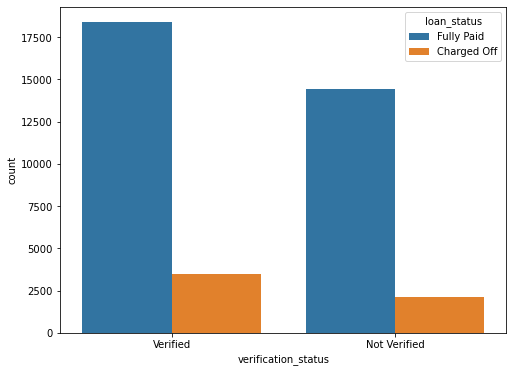

In [94]:
plt.figure(figsize=[8,6])
sns.countplot(x = 'verification_status', data=df, order = df.verification_status.value_counts().index,hue = 'loan_status')

/var/folders/z0/wbc1b27j3r5102_79kyb6hyr0000gn/T/ipykernel_10529/1578468429.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  return df[df.loan_status =='Charged Off'].drop(['loan_status', 'count'],1).set_index(key).plot(kind = 'bar', ylabel = 'percentage_charged_off', rot= rot, figsize = fig)


<AxesSubplot:xlabel='verification_status', ylabel='percentage_charged_off'>

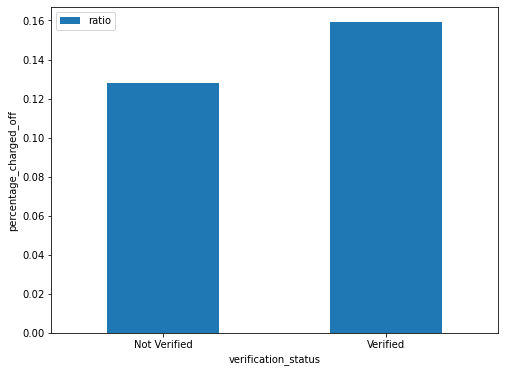

In [95]:
plot_default_ratio(sc_vs, 'verification_status')

### we can see here that surprisingly users with verfified income source are more likely to default than non-verified users

#### grade impact on loan_status

In [96]:
sc_grade = segmented_comparison('grade', df); sc_grade

,grade,loan_status,count,ratio
0,A,Charged Off,600,0.059934
1,A,Fully Paid,9411,0.940066
2,B,Charged Off,1415,0.121553
3,B,Fully Paid,10226,0.878447
4,C,Charged Off,1339,0.171843
5,C,Fully Paid,6453,0.828157
6,D,Charged Off,1111,0.219175
7,D,Fully Paid,3958,0.780825
8,E,Charged Off,715,0.268797
9,E,Fully Paid,1945,0.731203


<AxesSubplot:xlabel='grade', ylabel='count'>

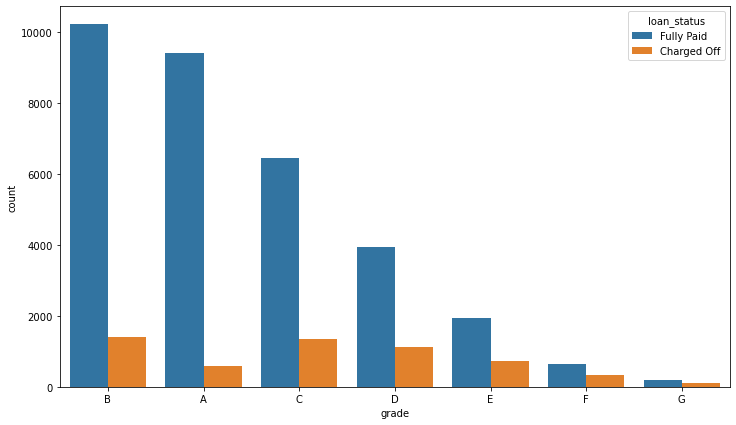

In [97]:
plt.figure(figsize=[12,7])
sns.countplot(x = 'grade', data=df, order = df.grade.value_counts().index,hue = 'loan_status')

/var/folders/z0/wbc1b27j3r5102_79kyb6hyr0000gn/T/ipykernel_10529/1578468429.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  return df[df.loan_status =='Charged Off'].drop(['loan_status', 'count'],1).set_index(key).plot(kind = 'bar', ylabel = 'percentage_charged_off', rot= rot, figsize = fig)


<AxesSubplot:xlabel='grade', ylabel='percentage_charged_off'>

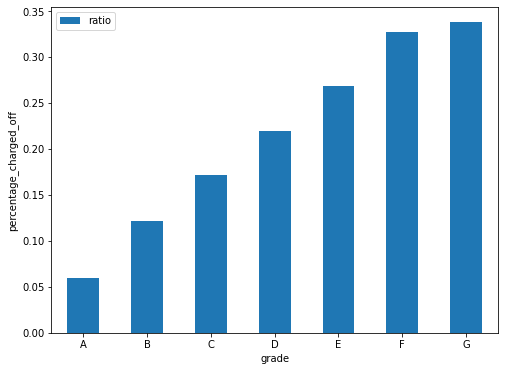

In [98]:
plot_default_ratio(sc_grade, 'grade')

### As expected grade plays a major role in whether a user will default or not. The default percentage seems to keep on increasing as the grade increases

#### Anual income impact on loan_status

In [99]:
sc_aib = segmented_comparison('anual_income_bucketed', df); sc_aib

,anual_income_bucketed,loan_status,count,ratio
0,"(3999.0, 35000.0]",Charged Off,1179,0.180524
1,"(3999.0, 35000.0]",Fully Paid,5352,0.819476
2,"(35000.0, 46500.0]",Charged Off,1037,0.164944
3,"(35000.0, 46500.0]",Fully Paid,5250,0.835056
4,"(46500.0, 58868.0]",Charged Off,957,0.149930
5,"(46500.0, 58868.0]",Fully Paid,5426,0.850070
6,"(58868.0, 72000.0]",Charged Off,933,0.144427
7,"(58868.0, 72000.0]",Fully Paid,5527,0.855573
8,"(72000.0, 96000.0]",Charged Off,803,0.125253
9,"(72000.0, 96000.0]",Fully Paid,5608,0.874747


<AxesSubplot:xlabel='anual_income_bucketed', ylabel='count'>

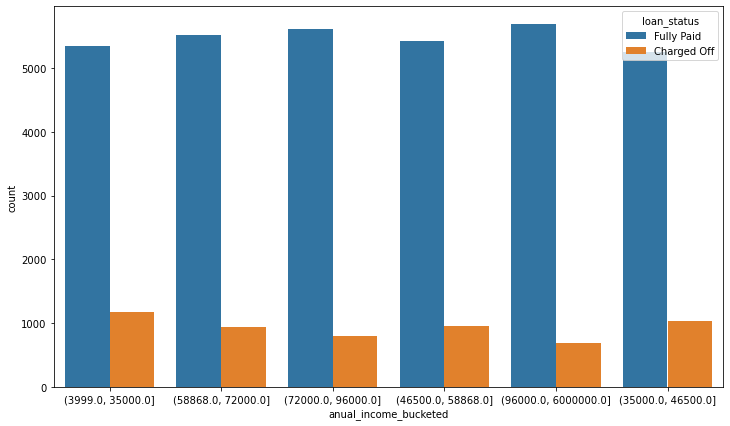

In [100]:
plt.figure(figsize=[12,7])
sns.countplot(x = 'anual_income_bucketed', data=df, order = df.anual_income_bucketed.value_counts().index,hue = 'loan_status')


/var/folders/z0/wbc1b27j3r5102_79kyb6hyr0000gn/T/ipykernel_10529/1578468429.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  return df[df.loan_status =='Charged Off'].drop(['loan_status', 'count'],1).set_index(key).plot(kind = 'bar', ylabel = 'percentage_charged_off', rot= rot, figsize = fig)


<AxesSubplot:xlabel='anual_income_bucketed', ylabel='percentage_charged_off'>

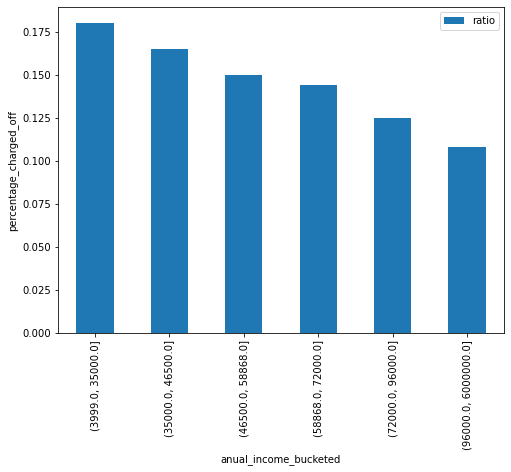

In [101]:
plot_default_ratio(sc_aib, 'anual_income_bucketed', rotate=True)

### As seen above Lower income users are more likely to default than higher income users

#### loan amount impact on loan_status

In [102]:
sc_fab = segmented_comparison('funded_amnt_inv_bucketed', df); sc_fab

,funded_amnt_inv_bucketed,loan_status,count,ratio
0,"(-1.0, 3975.0]",Charged Off,962,0.152529
1,"(-1.0, 3975.0]",Fully Paid,5345,0.847471
2,"(3975.0, 6000.0]",Charged Off,946,0.131939
3,"(3975.0, 6000.0]",Fully Paid,6224,0.868061
4,"(6000.0, 8733.0]",Charged Off,749,0.131797
5,"(6000.0, 8733.0]",Fully Paid,4934,0.868203
6,"(8733.0, 11975.0]",Charged Off,839,0.127025
7,"(8733.0, 11975.0]",Fully Paid,5766,0.872975
8,"(11975.0, 16250.0]",Charged Off,931,0.148746
9,"(11975.0, 16250.0]",Fully Paid,5328,0.851254


<AxesSubplot:xlabel='funded_amnt_inv_bucketed', ylabel='count'>

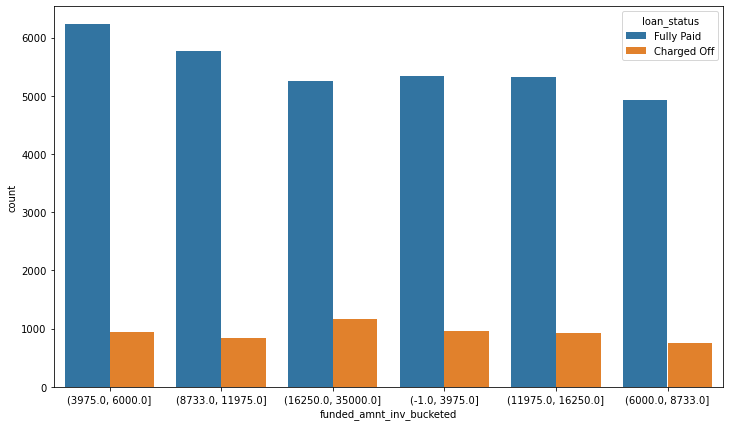

In [103]:
plt.figure(figsize=[12,7])
sns.countplot(x = 'funded_amnt_inv_bucketed', data=df, order = df.funded_amnt_inv_bucketed.value_counts().index,hue = 'loan_status')


/var/folders/z0/wbc1b27j3r5102_79kyb6hyr0000gn/T/ipykernel_10529/1578468429.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  return df[df.loan_status =='Charged Off'].drop(['loan_status', 'count'],1).set_index(key).plot(kind = 'bar', ylabel = 'percentage_charged_off', rot= rot, figsize = fig)


<AxesSubplot:xlabel='funded_amnt_inv_bucketed', ylabel='percentage_charged_off'>

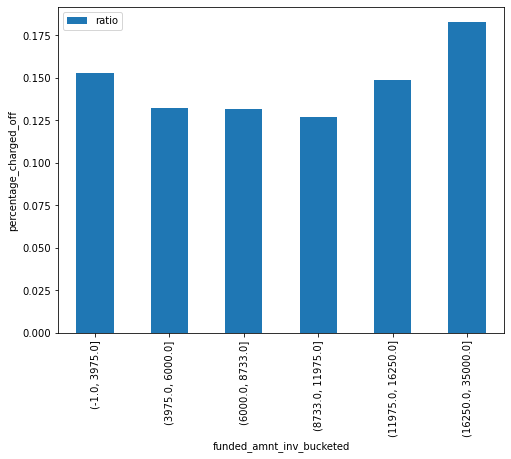

In [104]:
plot_default_ratio(sc_fab, 'funded_amnt_inv_bucketed', rotate=True)

### As the loan amount increases, the cahnces of default also increases

#### issue year impact on loan_status

In [105]:
sc_issue_year = segmented_comparison('issue_year', df); sc_issue_year

,issue_year,loan_status,count,ratio
0,2007,Charged Off,45,0.180000
1,2007,Fully Paid,205,0.820000
2,2008,Charged Off,220,0.153417
3,2008,Fully Paid,1214,0.846583
4,2009,Charged Off,594,0.125954
5,2009,Fully Paid,4122,0.874046
6,2010,Charged Off,1485,0.128772
7,2010,Fully Paid,10047,0.871228
8,2011,Charged Off,3256,0.158705
9,2011,Fully Paid,17260,0.841295


<AxesSubplot:xlabel='issue_year', ylabel='count'>

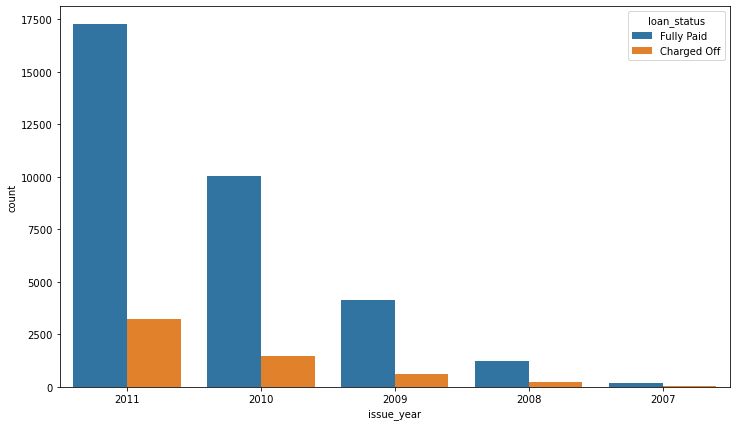

In [106]:
plt.figure(figsize=[12,7])
sns.countplot(x = 'issue_year', data=df, order = df.issue_year.value_counts().index,hue = 'loan_status')


/var/folders/z0/wbc1b27j3r5102_79kyb6hyr0000gn/T/ipykernel_10529/1578468429.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  return df[df.loan_status =='Charged Off'].drop(['loan_status', 'count'],1).set_index(key).plot(kind = 'bar', ylabel = 'percentage_charged_off', rot= rot, figsize = fig)


<AxesSubplot:xlabel='issue_year', ylabel='percentage_charged_off'>

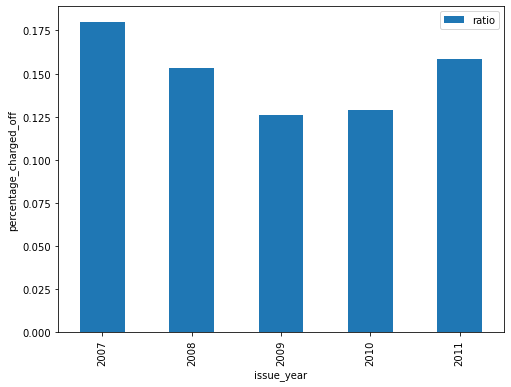

In [107]:
plot_default_ratio(sc_issue_year, 'issue_year', rotate=True)

### we can clearly see above that most defaults were in the year 2007, this is probably due to the recession

#### interest rate impact on loan_status

In [108]:
sc_ir = segmented_comparison('interest_rate_bucketed', df); sc_ir

,interest_rate_bucketed,loan_status,count,ratio
0,"(5.300000000000001, 8.9]",Charged Off,583,0.059648
1,"(5.300000000000001, 8.9]",Fully Paid,9191,0.940352
2,"(8.9, 11.7]",Charged Off,1109,0.117317
3,"(8.9, 11.7]",Fully Paid,8344,0.882683
4,"(11.7, 14.4]",Charged Off,1527,0.159378
5,"(11.7, 14.4]",Fully Paid,8054,0.840622
6,"(14.4, 24.4]",Charged Off,2381,0.246992
7,"(14.4, 24.4]",Fully Paid,7259,0.753008


<AxesSubplot:xlabel='interest_rate_bucketed', ylabel='count'>

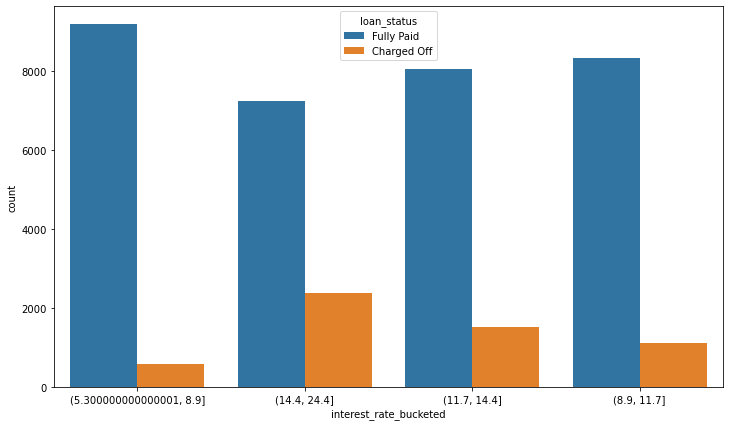

In [109]:
plt.figure(figsize=[12,7])
sns.countplot(x = 'interest_rate_bucketed', data=df, order = df.interest_rate_bucketed.value_counts().index,hue = 'loan_status')


/var/folders/z0/wbc1b27j3r5102_79kyb6hyr0000gn/T/ipykernel_10529/1578468429.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  return df[df.loan_status =='Charged Off'].drop(['loan_status', 'count'],1).set_index(key).plot(kind = 'bar', ylabel = 'percentage_charged_off', rot= rot, figsize = fig)


<AxesSubplot:xlabel='interest_rate_bucketed', ylabel='percentage_charged_off'>

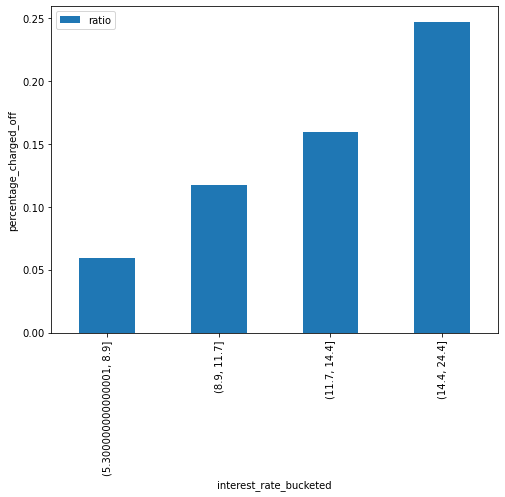

In [110]:
plot_default_ratio(sc_ir, 'interest_rate_bucketed', rotate=True)

### From the above information we can conclude that users who are charged a higher interest rate are way more lilely to default than users being charged a lower rate

#### interest rate impact on loan_status

In [111]:
sc_term = segmented_comparison('term_months', df); sc_term

,term_months,loan_status,count,ratio
0,36,Charged Off,3200,0.110471
1,36,Fully Paid,25767,0.889529
2,60,Charged Off,2400,0.253138
3,60,Fully Paid,7081,0.746862


<AxesSubplot:xlabel='term_months', ylabel='count'>

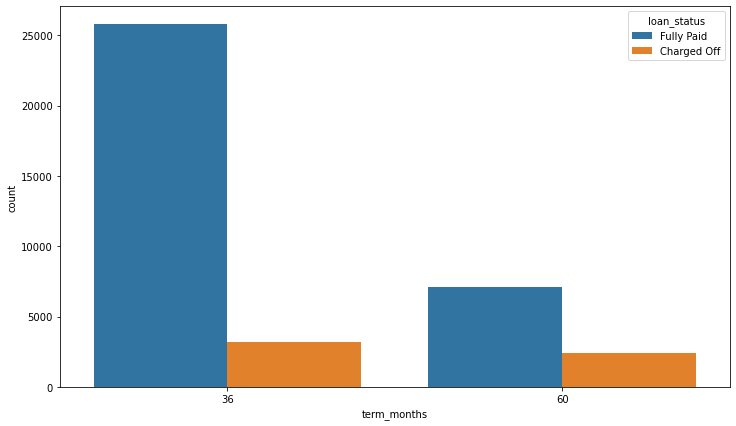

In [112]:
plt.figure(figsize=[12,7])
sns.countplot(x = 'term_months', data=df, order = df.term_months.value_counts().index,hue = 'loan_status')


/var/folders/z0/wbc1b27j3r5102_79kyb6hyr0000gn/T/ipykernel_10529/1578468429.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  return df[df.loan_status =='Charged Off'].drop(['loan_status', 'count'],1).set_index(key).plot(kind = 'bar', ylabel = 'percentage_charged_off', rot= rot, figsize = fig)


<AxesSubplot:xlabel='term_months', ylabel='percentage_charged_off'>

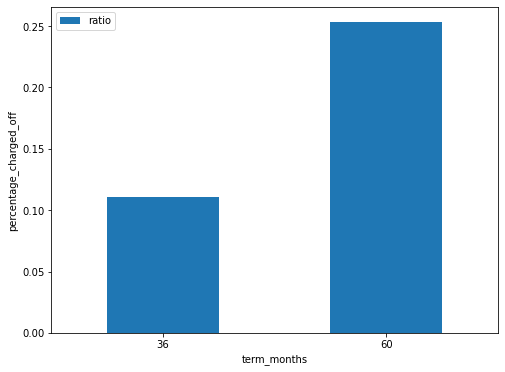

In [113]:
plot_default_ratio(sc_term, 'term_months', rotate=False)

### From the above information we can conclude that users with 60 months term are more highly likely to default

#### Bivariate & Multivariate analysis

In [114]:
df.corr()

,funded_amnt_inv,term_months,int_rate_pct,installment,annual_inc,dti,issue_year
funded_amnt_inv,1.000000,0.342541,0.297008,0.906352,0.252300,0.069678,0.243200
term_months,0.342541,1.000000,0.440062,0.089321,0.043606,0.075837,0.235546
int_rate_pct,0.297008,0.440062,1.000000,0.276662,0.048770,0.109982,0.036780
installment,0.906352,0.089321,0.276662,1.000000,0.267939,0.051349,0.047794
annual_inc,0.252300,0.043606,0.048770,0.267939,1.000000,-0.121815,0.007124
dti,0.069678,0.075837,0.109982,0.051349,-0.121815,1.000000,0.091590
issue_year,0.243200,0.235546,0.036780,0.047794,0.007124,0.091590,1.000000


<AxesSubplot:>

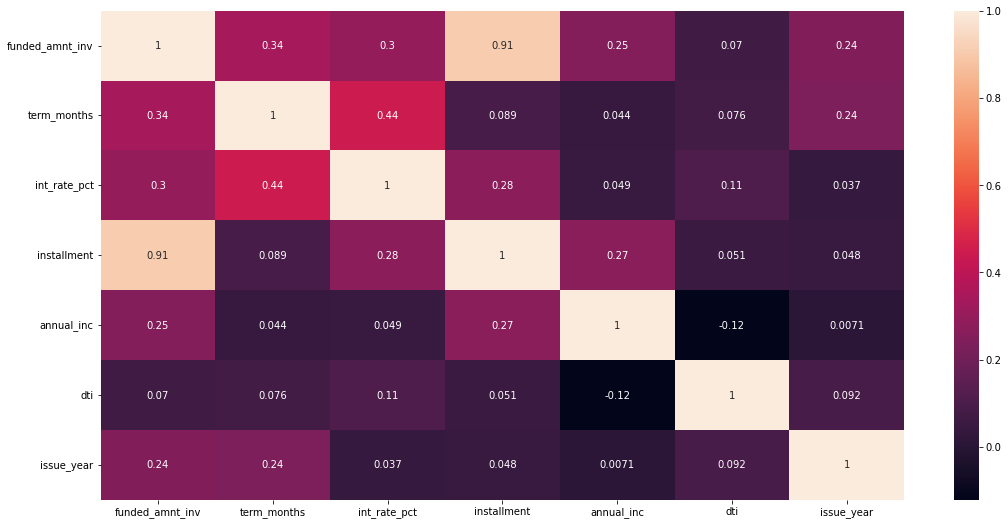

In [115]:
plt.figure(figsize=[18,9])
sns.heatmap(df.corr(),annot=True)

#### from the above correlation matrix we can conclude that loan amount and installments have a hhigh correlation, which is quite obvious. no other features are highly co-related

## Recommendations and Conclusion

### From our analysis we can conclude that, the driving features that have most impcat on the loan being defaulted or not are: 
* Grade (user credit grade)
* int_rate (interest rate %)
* term (loan duration)
* home_ownership (user home ownership status)
* Purpose (loan purpose)
* funded_amnt_inv (loan amount)
* annual_income (users annual income)

### Since Now we know what are the driving features that leads to a loan defaulting, we can recommend lending club the following


* Users with higher credit grades(A, B, C) are less likely to default and users with low grades(E, F, G) are very likely to default
* If the interest rate is kept under 10%, there’s a good chance user won’t default
* It is recommended that loan term be kept to 36 months only
* It’d be better if loans are not given to individuals with home ownership status as other/unknown.
* Loans for funding small businesses are very risky. Loans taken for purchasing big equipments like cars seems to be less risky.
* As the loan amount increases, the chances of default also increases
* Users with low annual income have a high chance to default, so appropriate actions needs to be taken while providing loans to low income users


## Extra(modelling)

In [150]:
df_m = df.copy()

In [151]:
df_m.head()

,funded_amnt_inv,term_months,int_rate_pct,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,anual_income_bucketed,funded_amnt_inv_bucketed,interest_rate_bucketed,issue_year
0,4975.0,36,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,860xx,AZ,27.65,"(3999.0, 35000.0]","(3975.0, 6000.0]","(8.9, 11.7]",2011
1,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Verified,2011-12-01,Charged Off,car,bike,309xx,GA,1.00,"(3999.0, 35000.0]","(-1.0, 3975.0]","(14.4, 24.4]",2011
2,2400.0,36,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,606xx,IL,8.72,"(3999.0, 35000.0]","(-1.0, 3975.0]","(14.4, 24.4]",2011
3,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Verified,2011-12-01,Fully Paid,other,personel,917xx,CA,20.00,"(46500.0, 58868.0]","(8733.0, 11975.0]","(11.7, 14.4]",2011
5,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,"(35000.0, 46500.0]","(3975.0, 6000.0]","(5.300000000000001, 8.9]",2011


In [152]:
df_m.drop(['emp_title', 'issue_d', 'purpose', 'title', 'zip_code'], 1, inplace=True)

/var/folders/z0/wbc1b27j3r5102_79kyb6hyr0000gn/T/ipykernel_10529/1577644229.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_m.drop(['emp_title', 'issue_d', 'purpose', 'title', 'zip_code'], 1, inplace=True)


In [154]:
df_m.drop(['interest_rate_bucketed', 'issue_year','funded_amnt_inv_bucketed', 'anual_income_bucketed'], 1, inplace =True)

/var/folders/z0/wbc1b27j3r5102_79kyb6hyr0000gn/T/ipykernel_10529/3569992026.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_m.drop(['interest_rate_bucketed', 'issue_year','funded_amnt_inv_bucketed', 'anual_income_bucketed'], 1, inplace =True)


In [155]:
df_m.head()

,funded_amnt_inv,term_months,int_rate_pct,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,addr_state,dti
0,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,AZ,27.65
1,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Verified,Charged Off,GA,1.00
2,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,IL,8.72
3,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Verified,Fully Paid,CA,20.00
5,5000.0,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Verified,Fully Paid,AZ,11.20


In [156]:
from sklearn.preprocessing import LabelEncoder

lec = LabelEncoder()


In [157]:
df_m.grade = lec.fit_transform(df_m.grade)

In [158]:
df_m.sub_grade = lec.fit_transform(df_m.sub_grade)

In [159]:
df_m.emp_length = lec.fit_transform(df_m.emp_length)

In [160]:
df_m.home_ownership = lec.fit_transform(df_m.home_ownership)

In [161]:
df_m.verification_status = lec.fit_transform(df_m.verification_status)

In [162]:
df_m.addr_state = lec.fit_transform(df_m.addr_state)

In [163]:
df_m.loan_status = lec.fit_transform(df_m.loan_status)

In [164]:
df_m.head()

,funded_amnt_inv,term_months,int_rate_pct,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,addr_state,dti
0,4975.0,36,10.65,162.87,1,6,1,4,24000.0,1,1,3,27.65
1,2500.0,60,15.27,59.83,2,13,10,4,30000.0,1,0,10,1.00
2,2400.0,36,15.96,84.33,2,14,1,4,12252.0,0,1,14,8.72
3,10000.0,36,13.49,339.31,2,10,1,4,49200.0,1,1,4,20.00
5,5000.0,36,7.90,156.46,0,3,3,4,36000.0,1,1,3,11.20


In [165]:
df_m.dtypes

funded_amnt_inv        float64
term_months              int64
int_rate_pct           float64
installment            float64
grade                    int64
sub_grade                int64
emp_length               int64
home_ownership           int64
annual_inc             float64
verification_status      int64
loan_status              int64
addr_state               int64
dti                    float64
dtype: object

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [167]:
x, y = df_m.drop(['loan_status'],axis=1),df_m['loan_status']
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=df_m.loan_status, random_state=11)

In [168]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.model_selection import GridSearchCV

In [169]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred_test = gnb.predict(x_test)
print(f'accuracy: {accuracy_score(y_test,y_pred_test)}\n\
precision: {precision_score(y_test, y_pred_test, average = "weighted")}\n\
recall:  {recall_score(y_test, y_pred_test, average="weighted")}\n\
f1_score: {f1_score(y_test, y_pred_test, average="weighted")}\n\
f2_score: {fbeta_score(y_test, y_pred_test, average= "weighted", beta= .5)}')


accuracy: 0.8013940907199334
precision: 0.7947413729148404
recall:  0.8013940907199334
f1_score: 0.797961559664259
f2_score: 0.796002881602482


In [170]:
logreg = LogisticRegression(solver = 'lbfgs',multi_class='auto')
logreg.fit(x_train,y_train)
y_pred_test = logreg.predict(x_test)
print(f'accuracy: {accuracy_score(y_test,y_pred_test)}\n\
precision: {precision_score(y_test, y_pred_test, average = "weighted")}\n\
recall:  {recall_score(y_test, y_pred_test, average="weighted")}\n\
f1_score: {f1_score(y_test, y_pred_test, average="weighted")}\n\
f2_score: {fbeta_score(y_test, y_pred_test, average= "weighted", beta= .5)}')

accuracy: 0.8541406575114441
precision: 0.7973372701450402
recall:  0.8541406575114441
f1_score: 0.7893069992097893
f2_score: 0.7575244467527781


/Users/rishabh/opt/miniconda3/envs/py39new/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### SVM

In [171]:
svc = SVC(C=1,kernel='rbf',gamma='scale')     
svc.fit(x_train,y_train)
y_pred_test = svc.predict(x_test)
print(f'accuracy: {accuracy_score(y_test,y_pred_test)}\n\
precision: {precision_score(y_test, y_pred_test, average = "weighted")}\n\
recall:  {recall_score(y_test, y_pred_test, average="weighted")}\n\
f1_score: {f1_score(y_test, y_pred_test, average="weighted")}\n\
f2_score: {fbeta_score(y_test, y_pred_test, average= "weighted", beta= .5)}')

accuracy: 0.8543487307532251
precision: 0.7299117537396468
recall:  0.8543487307532251
f1_score: 0.7872432424759296
f2_score: 0.7518122349920151


/Users/rishabh/opt/miniconda3/envs/py39new/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNN

In [172]:
clf = KNeighborsClassifier(n_neighbors=5,algorithm='auto')
clf.fit(x_train,y_train)
y_pred_test = clf.predict(x_test)
print(f'accuracy: {accuracy_score(y_test,y_pred_test)}\n\
precision: {precision_score(y_test, y_pred_test, average = "weighted")}\n\
recall:  {recall_score(y_test, y_pred_test, average="weighted")}\n\
f1_score: {f1_score(y_test, y_pred_test, average="weighted")}\n\
f2_score: {fbeta_score(y_test, y_pred_test, average= "weighted", beta= .5)}')

accuracy: 0.8373907615480649
precision: 0.759476951296166
recall:  0.8373907615480649
f1_score: 0.7873777371221062
f2_score: 0.7646232648536077


In [173]:
import shap


In [174]:
shap.initjs()

In [176]:
from sklearn.ensemble import RandomForestClassifier


In [177]:
model = RandomForestClassifier()


In [178]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [179]:
y_pred_test = model.predict(x_test)
print(f'accuracy: {accuracy_score(y_test,y_pred_test)}\n\
precision: {precision_score(y_test, y_pred_test, average = "weighted")}\n\
recall:  {recall_score(y_test, y_pred_test, average="weighted")}\n\
f1_score: {f1_score(y_test, y_pred_test, average="weighted")}\n\
f2_score: {fbeta_score(y_test, y_pred_test, average= "weighted", beta= .5)}')

accuracy: 0.8525801081980857
precision: 0.7967037394648445
recall:  0.8525801081980857
f1_score: 0.7967708630124453
f2_score: 0.775074595316362


In [ ]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(x_test)

# visualize the first prediction's explanation
# shap.plots.waterfall(shap_values[0])
shap.plots.force(shap_values[0])

In [ ]:
shap_values

In [180]:
importances = model.feature_importances_

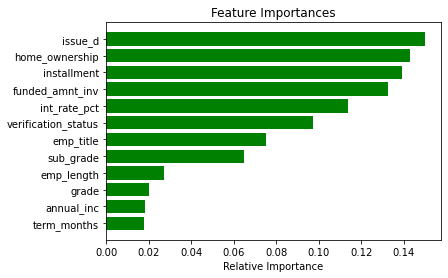

In [181]:
indices = np.argsort(importances)
features = df.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap.summary_plot(shap_values, x_test.values, plot_type="bar",class_names= 'loan_status',  feature_names = x_test.columns)


In [ ]:
shap.summary_plot(shap_values[1], x_test.values, feature_names = x_test.columns)